In [1]:
from infrastructure.dataclasses import Experiment, TrainParameters
from infrastructure.training import train
import torch

experiment = Experiment(
    tensor_parameters=dict(dtype=torch.float32, device=torch.device("cpu")),
    dataset_name="banana",
    dataset_number_of_points=1000,
    dataloader_parameters=dict(batch_size=256, shuffle=True),
    pushforward_operator_name="convex_potential_flow",
    pushforward_operator_parameters=dict(
        feature_dimension=1,
        response_dimension=2,
        hidden_dimension=2,
        number_of_hidden_layers=2,
        n_blocks=4
    ),
    train_parameters=TrainParameters(
        number_of_epochs_to_train=500,
        verbose=True,
        optimizer_parameters=dict(lr=0.01),
        scheduler_parameters=dict(eta_min=0)
    )
)

model = train(experiment)
_ = model.eval()

Epoch: 500, Loss: -8.458, LR: 0.000000: 100%|██████████| 500/500 [02:45<00:00,  3.02it/s]


/Users/vladimirkondratev/conditional_quantile_function/src/pushforward_operators/cpflow/cpflows.py:219: UserWarning: brute force
  warnings.warn("brute force")


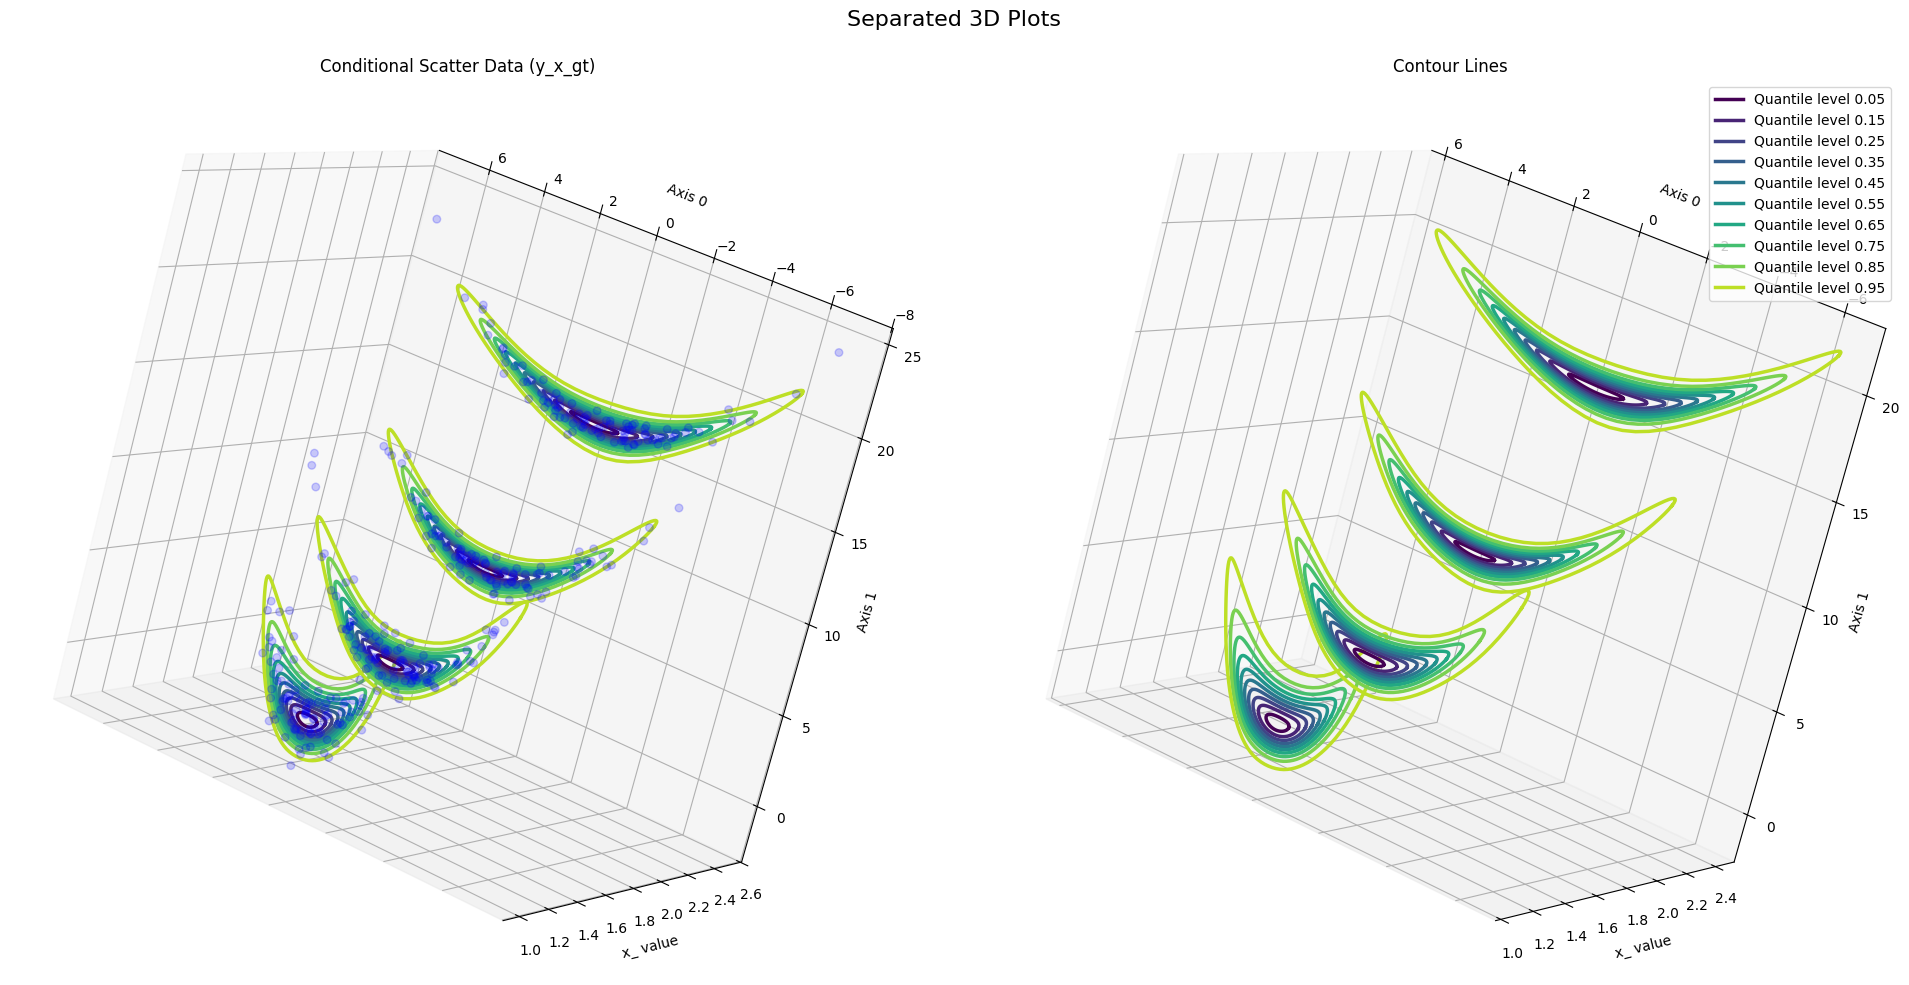

In [2]:
%matplotlib inline
from utils.plot import plot_potentials_from_banana_dataset

plot_potentials_from_banana_dataset(model=model, number_of_conditional_points=4, number_of_points_to_sample=100, tensor_parameters=experiment.tensor_parameters)

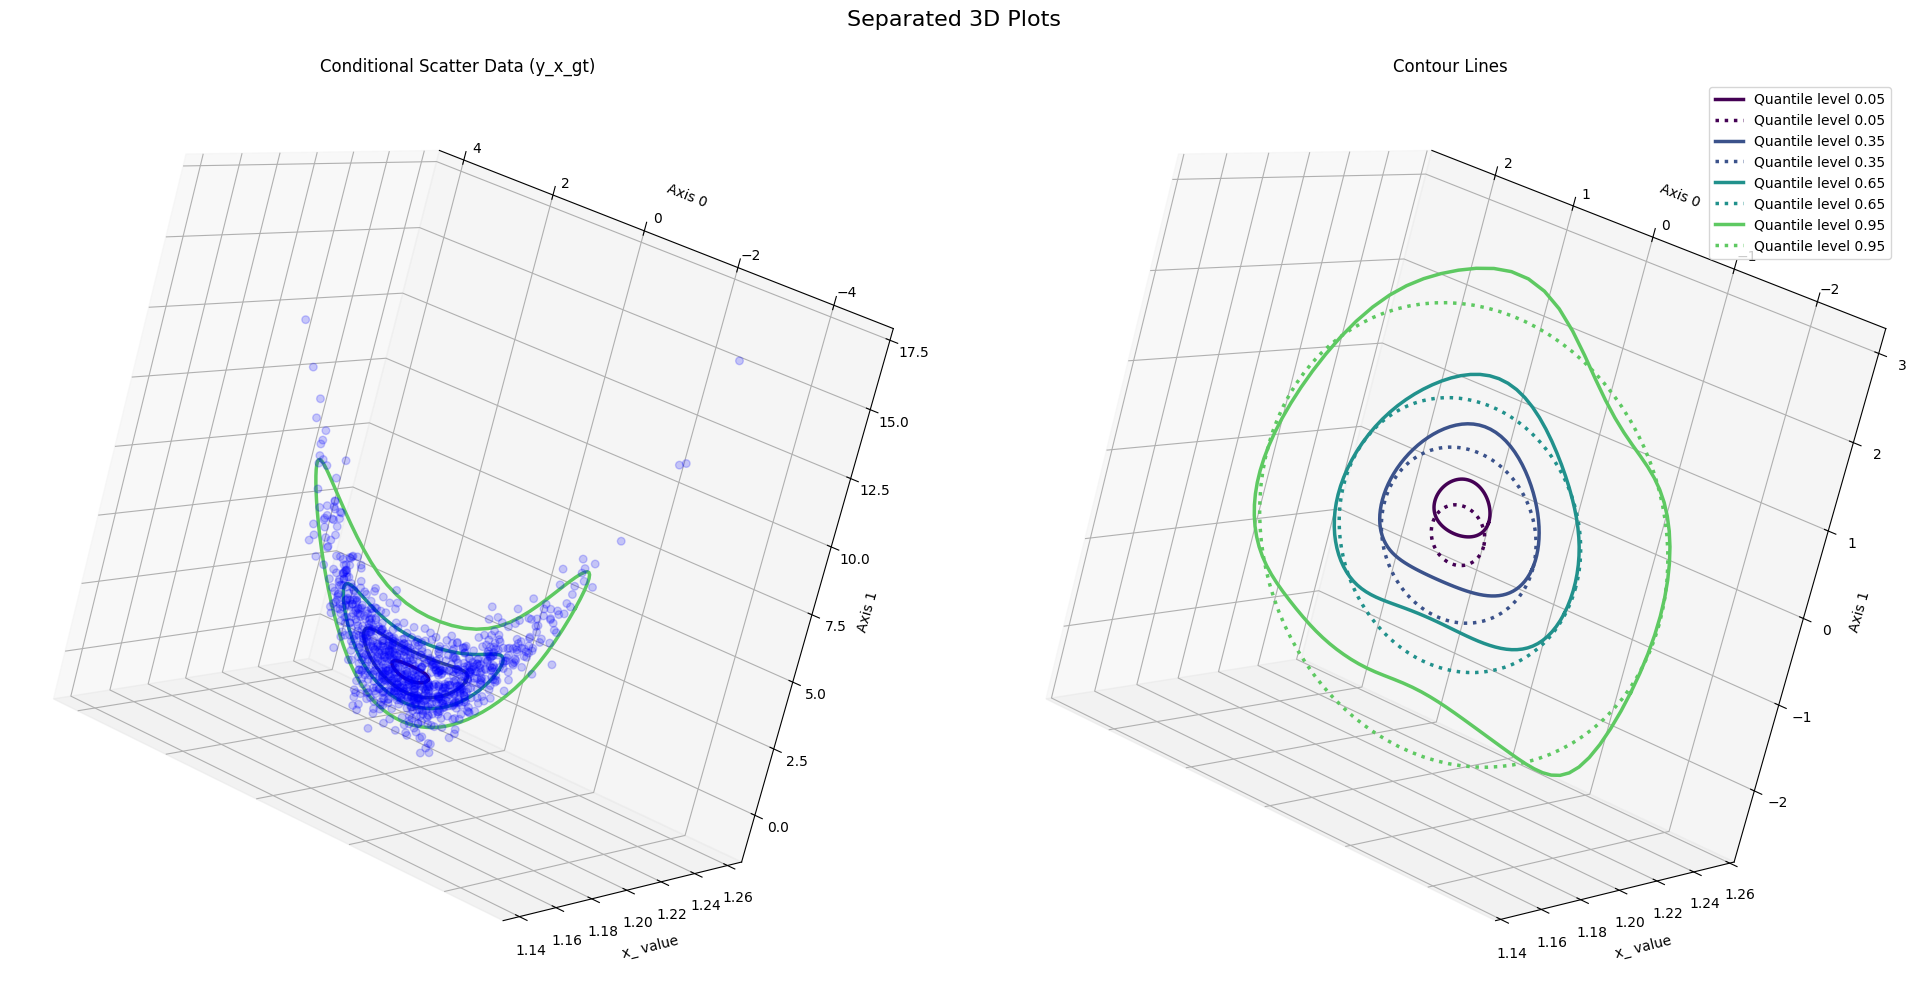

In [6]:
%matplotlib inline
from utils.plot import plot_quantile_levels_from_banana_dataset

plot_quantile_levels_from_banana_dataset(
    model=model,
    number_of_points_to_sample=1000,
    tensor_parameters=experiment.tensor_parameters,
    conditional_value=1.2,
    number_of_quantile_levels=4
)